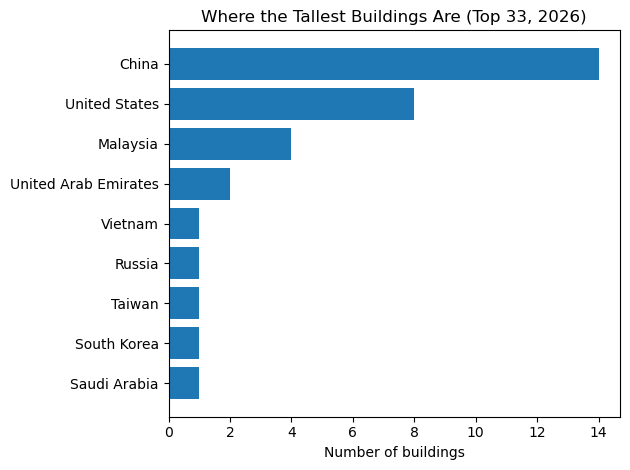

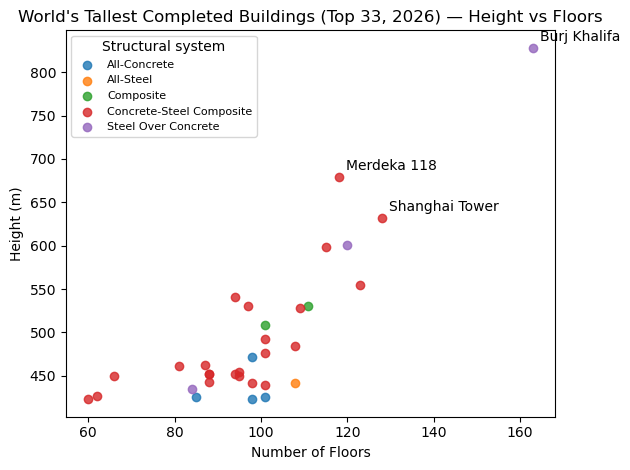

In [ ]:
"""
Python script that uses the database of tallest_buildings_top33_2026_ctbuh.csv
Source: CTBUH Skyscraper Center – Buildings: https://www.skyscrapercenter.com/buildings

Figure 1: Country bar chart (top N countries by count)
Figure 2: Height vs Floors scatter (by structural system)
"""
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH = "tallest_buildings_top33_2026_ctbuh.csv"

df = pd.read_csv(CSV_PATH)

# Figure 1: Counts by country (top 33)
country_counts = df["country"].value_counts().head(33).sort_values()
fig, ax = plt.subplots()
ax.barh(country_counts.index, country_counts.values)
ax.set_title("Where the Tallest Buildings Are (Top 33, 2026)")
ax.set_xlabel("Number of buildings")
plt.tight_layout()
plt.savefig("Figure1_Python.png", dpi=300)

plt.show()

# Figure 2: Height vs Floors (by structural system) 
fig, ax = plt.subplots()
for system, g in df.groupby("structural_system"):
    ax.scatter(g["floors"], g["height_m"], label=system, alpha=0.8)

# annotate the top 3 by height
top3 = df.sort_values("height_m", ascending=False).head(3)
for _, r in top3.iterrows():
    ax.annotate(r["building"], (r["floors"], r["height_m"]), xytext=(5,5), textcoords="offset points")

ax.set_title("World's Tallest Completed Buildings (Top 33, 2026) — Height vs Floors")
ax.set_xlabel("Number of Floors")
ax.set_ylabel("Height (m)")
ax.legend(title="Structural system", fontsize=8)
plt.tight_layout()
plt.savefig("Figure2_Python.png", dpi=300)